In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns
plt.style.use('seaborn-v0_8-muted')
from IPython.display import display
from scipy import stats


%pip install missingno
from IPython.display import clear_output
import missingno as msno

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from IPython.display import display
import matplotlib.ticker as ticker

clear_output()

In [123]:
df=pd.read_csv('/Users/sumeet/Desktop/github/supervised learning/Mental_Health_Care_in_the_Last_4_Weeks.csv')

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# Basic understanding of the dataset

In [124]:
df.shape

(10404, 15)

In [125]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [126]:
df.info()
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10404 non-null  object 
 1   Group                   10404 non-null  object 
 2   State                   10404 non-null  object 
 3   Subgroup                10404 non-null  object 
 4   Phase                   10404 non-null  object 
 5   Time Period             10404 non-null  int64  
 6   Time Period Label       10404 non-null  object 
 7   Time Period Start Date  10404 non-null  object 
 8   Time Period End Date    10404 non-null  object 
 9   Value                   9914 non-null   float64
 10  LowCI                   9914 non-null   float64
 11  HighCI                  9914 non-null   float64
 12  Confidence Interval     9914 non-null   object 
 13  Quartile Range          6732 non-null   object 
 14  Suppression Flag        22 non-null   

,Time Period,Value,LowCI,HighCI,Suppression Flag
count,10404.000000,9914.000000,9914.000000,9914.000000,22.0
mean,28.134948,17.450736,14.771565,20.475661,1.0
std,11.040210,8.270565,7.659396,9.052521,0.0
min,1.000000,1.400000,0.800000,2.000000,1.0
25%,20.000000,10.300000,8.000000,12.900000,1.0
50%,29.000000,16.200000,13.900000,19.200000,1.0
75%,37.000000,24.000000,20.800000,27.400000,1.0
max,45.000000,62.900000,53.200000,71.900000,1.0


<p><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# look at the unique values for categorical columns</b>

In [127]:
# View all unique values in the categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()


Unique values in 'Indicator':
['Took Prescription Medication for Mental Health, Last 4 Weeks'
 'Received Counseling or Therapy, Last 4 Weeks'
 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks'
 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']

Unique values in 'Group':
['National Estimate' 'By Age' 'By Sex'
 'By Presence of Symptoms of Anxiety/Depression'
 'By Race/Hispanic ethnicity' 'By Education' 'By State'
 'By Disability status' 'By Gender identity' 'By Sexual orientation']

Unique values in 'State':
['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North 

<p><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;# rename indicators for better readability</b><p>

In [128]:
# Rename the columns for better readability
indicator_rename_map = {
    'Took Prescription Medication for Mental Health, Last 4 Weeks': 'Took Medication',
    'Received Counseling or Therapy, Last 4 Weeks': 'Received Counseling or Therapy',
    'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': 'Took medication AND/OR therapy',
    'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks': "Needed therapy but didn't get it"
}

df['Indicator'] = df['Indicator'].replace(indicator_rename_map)


Text(0.5, 0, '')

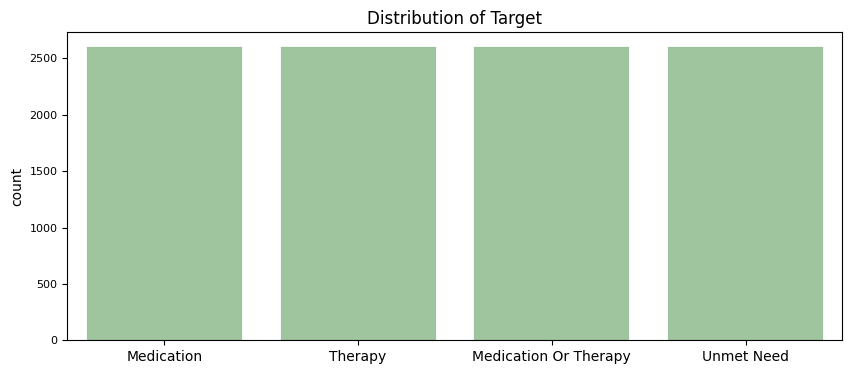

In [129]:

# Visualize the distribution of the target variable to ensure we have enough of each category
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Indicator', color='green', linewidth=0.2, edgecolor='gray', alpha=0.4)
plt.xticks(ticks=np.arange(4), labels=['Medication', 'Therapy', 'Medication Or Therapy', 'Unmet Need'], fontsize=10)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=8)  # Adjust font size for y-axis ticks
plt.title('Distribution of Target')
plt.xlabel("")

# Visualizing missing data, dropping rows with smallest % of missing data

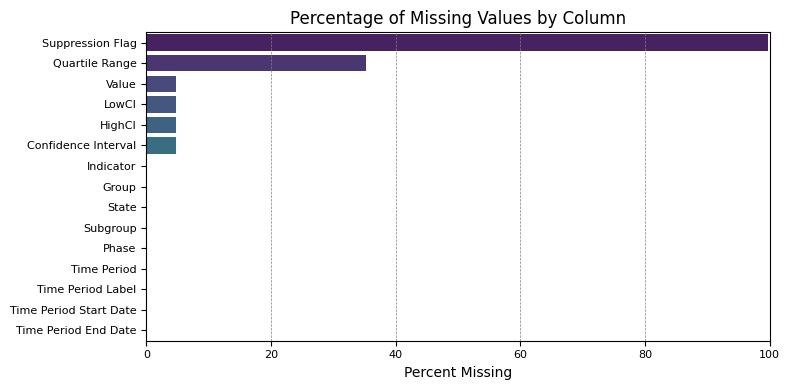

=== Missing Data Stats ===
Suppression Flag          99.788543
Quartile Range            35.294118
Value                      4.709727
LowCI                      4.709727
HighCI                     4.709727
Confidence Interval        4.709727
Indicator                  0.000000
Group                      0.000000
State                      0.000000
Subgroup                   0.000000
Phase                      0.000000
Time Period                0.000000
Time Period Label          0.000000
Time Period Start Date     0.000000
Time Period End Date       0.000000
dtype: float64

=== Row Count Analysis ===
Initial Rows: 10404
Rows After Removal: 9914
Rows Removed: 490
Percent Removed: 4.71%


In [130]:


# Step 1: Visualize missing data
plt.figure(figsize=(8, 4))
missing_data = df.isnull().mean().sort_values(ascending=False) * 100
sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.xticks(fontsize=8)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=8)  # Adjust font size for y-axis ticks
plt.xlim(0, 100)  # Set x-axis limit to 100%
plt.axvline(x=20, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=40, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=60, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=80, color='gray', linestyle='--', linewidth=0.5)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percent Missing')
plt.ylabel('')
plt.tight_layout()

clear_output()
plt.show()

# Step 2: Count rows before and after dropping rows with missing core values
initial_row_count = len(df)
filtered_df = df.dropna(subset=['Value', 'LowCI', 'HighCI'])
filtered_row_count = len(filtered_df)
rows_removed = initial_row_count - filtered_row_count

# Step 3: Calculate percentage of data removed
percent_removed = (rows_removed / initial_row_count) * 100

# Display results
print("=== Missing Data Stats ===")
print(missing_data)

print("\n=== Row Count Analysis ===")
print(f"Initial Rows: {initial_row_count}")
print(f"Rows After Removal: {filtered_row_count}")
print(f"Rows Removed: {rows_removed}")
print(f"Percent Removed: {percent_removed:.2f}%")



<span style="margin-left: 24px; display:inline-block; color=gray, font=bold"> <b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Understanding the impact of dropping the missing data on distribution, equity outcomes of the data.</b></span>

In [131]:
# Step 1: Find rows that were dropped
missing_ci_rows = df[df[['Value', 'LowCI', 'HighCI']].isnull().any(axis=1)]

# Step 2: How many are we talking about?
print(f"Rows with missing Value, LowCI, or HighCI: {len(missing_ci_rows)}")

# Step 3: Summarize by Indicator and Subgroup
summary_missing = missing_ci_rows.groupby(['Indicator', 'Subgroup']).size().reset_index(name='Count')
print(summary_missing.sort_values('Count', ascending=False).head(10))

# Optional: check how many have meaningful 'Confidence Interval' values
has_ci_string = missing_ci_rows['Confidence Interval'].notnull().sum()
print(f"Rows with missing LowCI/HighCI but populated 'Confidence Interval': {has_ci_string}")

Rows with missing Value, LowCI, or HighCI: 490
                           Indicator                         Subgroup  Count
6   Needed therapy but didn't get it               80 years and above     12
39    Received Counseling or Therapy               80 years and above     11
0   Needed therapy but didn't get it                    18 - 29 years      5
54    Received Counseling or Therapy  Non-Hispanic White, single race      5
95    Took medication AND/OR therapy                    40 - 49 years      5
1   Needed therapy but didn't get it                    30 - 39 years      5
60    Received Counseling or Therapy                    United States      5
96    Took medication AND/OR therapy                    50 - 59 years      5
97    Took medication AND/OR therapy                    60 - 69 years      5
57    Received Counseling or Therapy  Some college/Associate's degree      5
Rows with missing LowCI/HighCI but populated 'Confidence Interval': 0


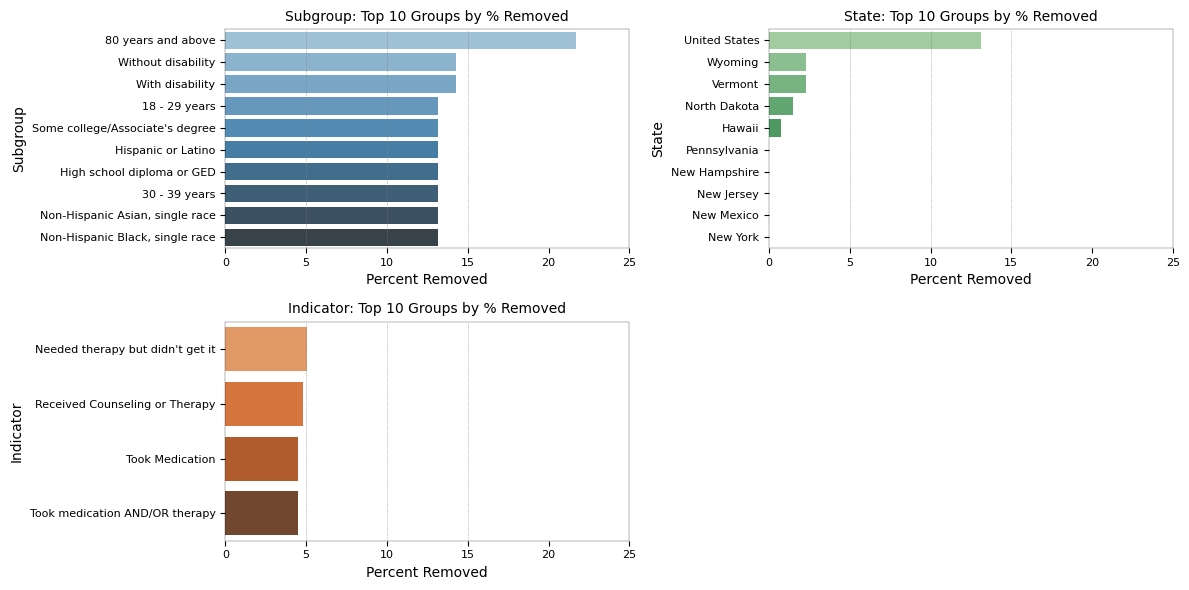

In [132]:

# Custom colors for each plot
palette_list = ['Blues_d', 'Greens_d', 'Oranges_d']  

def plot_top_missing_impact(df, group_col, ax, palette, top_n=10):
    counts_before = df[group_col].value_counts()
    counts_after = df.dropna(subset=['Value', 'LowCI', 'HighCI'])[group_col].value_counts()

    impact_df = pd.DataFrame({
        'Before Removal': counts_before,
        'After Removal': counts_after
    }).fillna(0)

    impact_df['Removed'] = impact_df['Before Removal'] - impact_df['After Removal']
    impact_df['Percent Removed'] = (impact_df['Removed'] / impact_df['Before Removal']) * 100
    impact_df = impact_df.sort_values(by='Percent Removed', ascending=False).head(top_n)

    # Plot with custom color
    sns.barplot(x=impact_df['Percent Removed'], y=impact_df.index, ax=ax, palette=palette)
    ax.set_title(f'{group_col}: Top {top_n} Groups by % Removed', fontsize=10, color='black')
    ax.set_xlim(0, 25)
    ax.tick_params(axis='x', labelsize=6)
    ax.axvline(x=5, color='gray', linestyle=":", linewidth=0.5)
    ax.axvline(x=10, color='gray', linestyle=":", linewidth=0.5)
    ax.axvline(x=15, color='gray', linestyle=":", linewidth=0.5)
    ax.set_xlabel('Percent Removed')
    ax.set_ylabel(group_col)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    for spine in ax.spines.values():
        spine.set_linewidth(0.2)

# Set up the figure layout
group_cols = ['Subgroup', 'State', 'Indicator']
n_groups = len(group_cols)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

# Plot each with a unique color palette
for i, col in enumerate(group_cols):
    plot_top_missing_impact(df, col, ax=axes[i], palette=palette_list[i], top_n=10)

# Remove unused subplot (the 4th one)
for j in range(n_groups, len(axes)):
    fig.delaxes(axes[j])

clear_output()

plt.tight_layout()
plt.show()


<span style="color:maroon">Important to also check that all outcome indicators are equally distributed if we plan to do modeling using various outcomes.

In [133]:
# Step 1: Count occurrences of each Subgroup before and after dropping rows
subgroup_counts_before = df['Subgroup'].value_counts().sort_index()
subgroup_counts_after = df.dropna(subset=['Value', 'LowCI', 'HighCI'])['Subgroup'].value_counts().sort_index()

# Step 2: Create a comparison DataFrame
subgroup_impact = pd.DataFrame({
    'Before Removal': subgroup_counts_before,
    'After Removal': subgroup_counts_after
})

# Step 3: Calculate rows removed and percent change
subgroup_impact['Removed'] = subgroup_impact['Before Removal'] - subgroup_impact['After Removal']
subgroup_impact['Percent Removed'] = (subgroup_impact['Removed'] / subgroup_impact['Before Removal']) * 100

# Step 4: Sort by percent removed
subgroup_impact_sorted = subgroup_impact.sort_values(by='Percent Removed', ascending=False)

# Display the result
print(subgroup_impact_sorted.head(10))  # Adjust number shown as needed


                                 Before Removal  After Removal  Removed  \
Subgroup                                                                  
80 years and above                          152            119       33   
Without disability                           84             72       12   
With disability                              84             72       12   
18 - 29 years                               152            132       20   
Some college/Associate's degree             152            132       20   
Hispanic or Latino                          152            132       20   
High school diploma or GED                  152            132       20   
30 - 39 years                               152            132       20   
Non-Hispanic Asian, single race             152            132       20   
Non-Hispanic Black, single race             152            132       20   

                                 Percent Removed  
Subgroup                                        

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<span style="color:green">What your table shows:
- missingness by subgroup, and for each row, losing between ~13% and 21% of data — that’s not nothing.
- will keep the copy of the original data for storytelling and more descriptive analysis

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;However, models require complete outcome data. 
most models (regression, tree-based, etc.) can’t learn patterns if the target variable (Value) or associated uncertainty (LowCI, HighCI) is missing. 

<span style="color:green">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- To preserve more context: I will be keeping subgroup, Indicator, Time Period, and any demographic flags as features.

<p style="margin-left: 20px;"> so far</p>
<pre>&nbsp;&nbsp;&nbsp;&nbsp;✅ Renamed and reviewed your outcome (y) variable
&nbsp;&nbsp;&nbsp;&nbsp;✅ Assessed and dropped rows with missing key metrics (Value, LowCI, HighCI)
&nbsp;&nbsp;&nbsp;&nbsp;✅ Evaluated the impact on subgroup representation</pre>


In [134]:
# Time for conversions

# Replace obvious anomalies and extract numeric part
df['Phase_Clean'] = df['Phase'].replace('-1', 'Unknown')  # Optional: handle '-1'
df['Phase_Clean'] = df['Phase_Clean'].str.extract(r'(\d+\.?\d*)')  # Extract numeric part
df['Phase_Clean'] = pd.to_numeric(df['Phase_Clean'], errors='coerce')  # Convert to float


def classify_subgroup(sub):
    if 'years' in sub:
        return 'Age'
    elif sub in ['Male', 'Female']:
        return 'Sex'
    elif 'Hispanic' in sub or 'race' in sub:
        return 'Race/Ethnicity'
    elif 'diploma' in sub or 'degree' in sub:
        return 'Education'
    elif 'disability' in sub:
        return 'Disability Status'
    elif 'gender' in sub:
        return 'Gender Identity'
    elif 'Straight' in sub or 'Gay' in sub or 'Bisexual' in sub:
        return 'Sexual Orientation'
    elif sub in df['State'].unique():
        return 'State'
    elif sub == 'United States':
        return 'National'
    else:
        return 'Other'

df['Subgroup_Category'] = df['Subgroup'].apply(classify_subgroup)

# Convert date columns
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'])
df = df.sort_values('Time Period Start Date')



In [135]:
df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag,Phase_Clean,Subgroup_Category
0,Took Medication,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN,2.0,State
195,Took medication AND/OR therapy,By State,New Jersey,New Jersey,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,21.8,19.3,24.4,19.3 - 24.4,21.8-23.5,NaN,2.0,State
194,Took medication AND/OR therapy,By State,New Hampshire,New Hampshire,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,24.3,20.4,28.5,20.4 - 28.5,23.6-25.3,NaN,2.0,State
193,Took medication AND/OR therapy,By State,Nevada,Nevada,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,17.7,15.4,20.1,15.4 - 20.1,17.7-21.7,NaN,2.0,State
192,Took medication AND/OR therapy,By State,Nebraska,Nebraska,2,13,"Aug 19 - Aug 31, 2020",2020-08-19,08/31/2020,25.3,21.6,29.2,21.6 - 29.2,23.6-25.3,NaN,2.0,State


<p style="font-size:20px;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;📈 Part 1: Trends in Use of Medication & Therapy since COVID</p>

<p style="text-indent: 2em;">“How did use of medication and therapy change over time for each subgroup (e.g., by age, race/ethnicity, gender, etc.)?”</p>

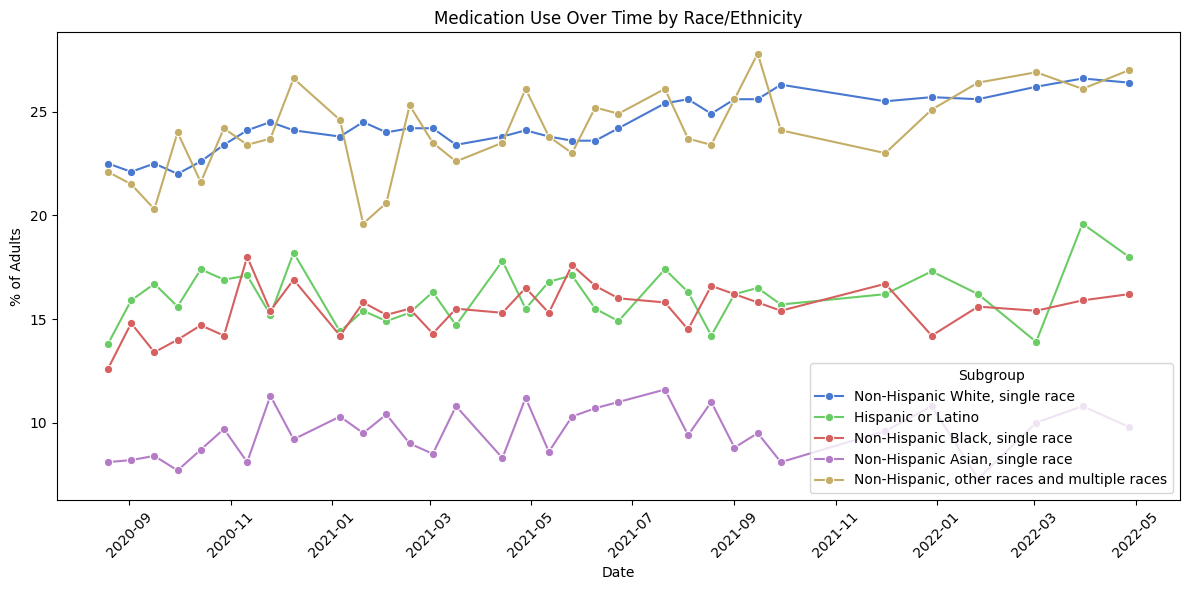

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to "Received Counseling or Therapy" and Race/Ethnicity
therapy_race = df[
    (df['Indicator'] == 'Took Medication') &
    (df['Subgroup_Category'] == 'Race/Ethnicity')
].copy()

# Convert date
therapy_race['Time Period Start Date'] = pd.to_datetime(therapy_race['Time Period Start Date'])
therapy_race = therapy_race.sort_values('Time Period Start Date')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=therapy_race,
    x='Time Period Start Date',
    y='Value',
    hue='Subgroup',
    marker='o'
)
plt.title('Medication Use Over Time by Race/Ethnicity')
plt.xlabel('Date')
plt.ylabel('% of Adults')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




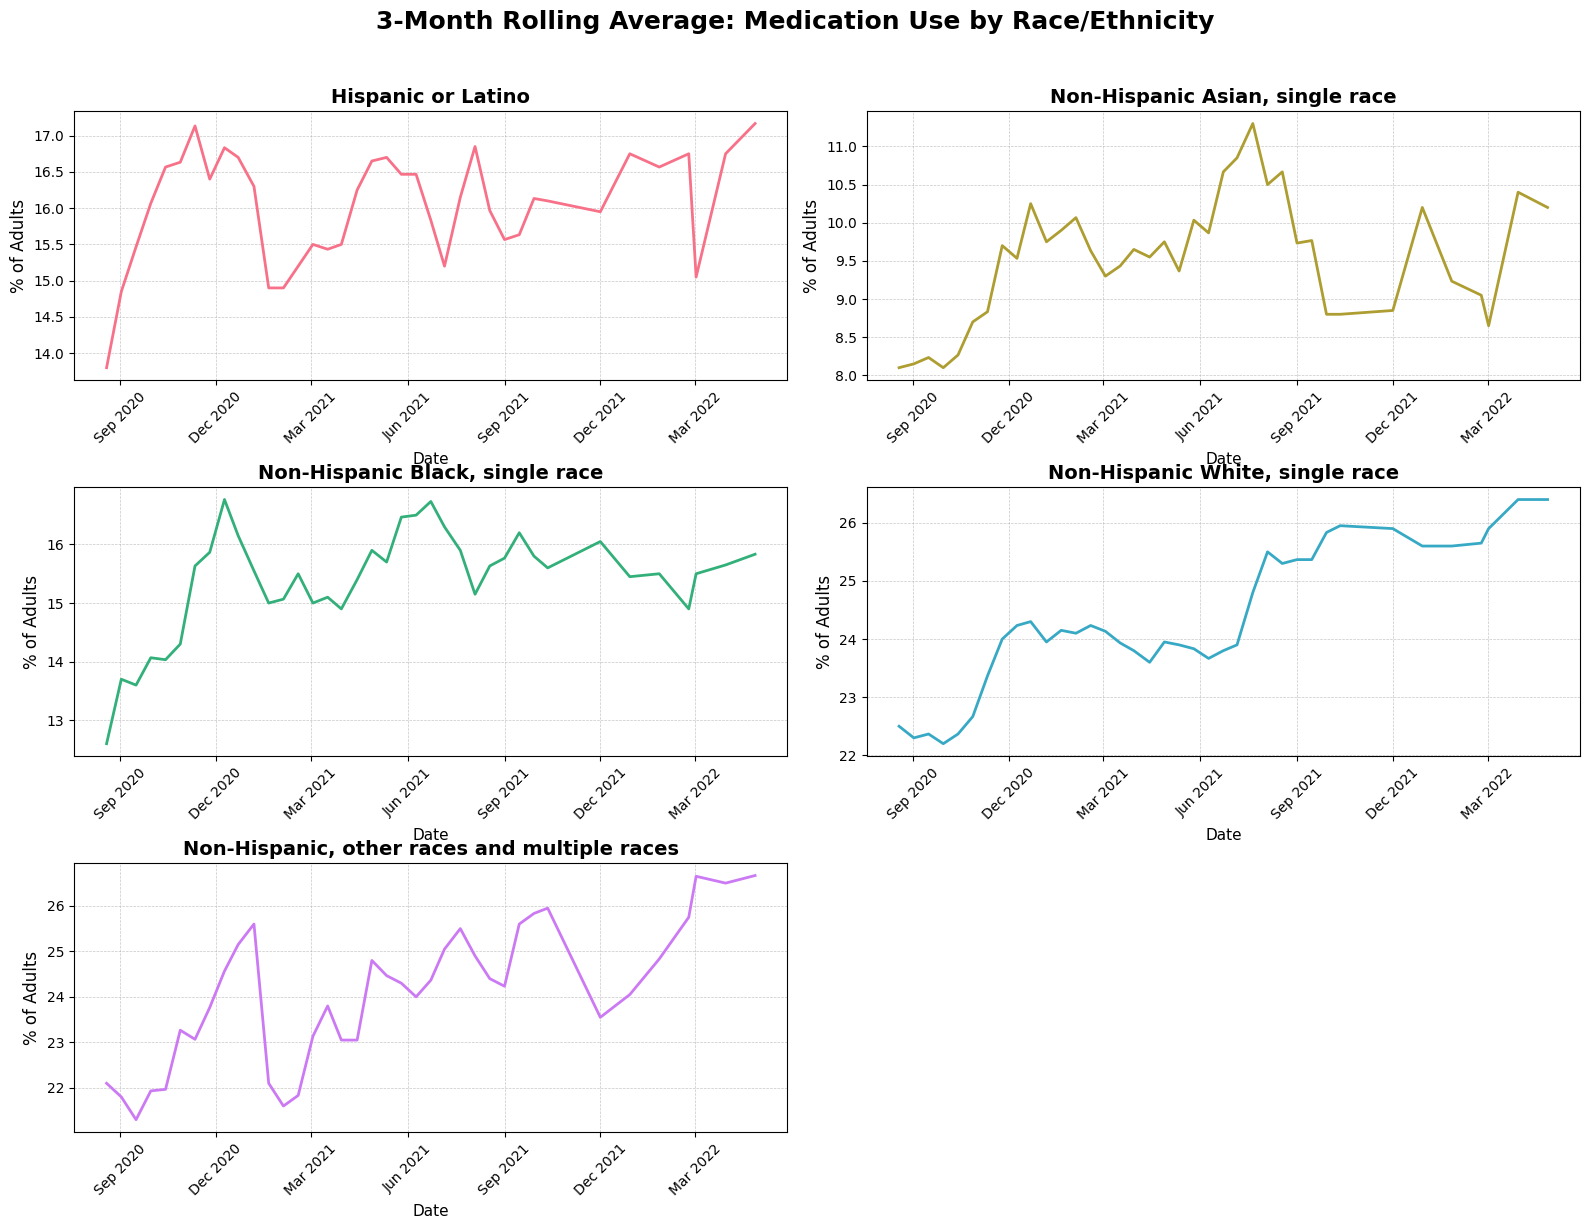

In [137]:
# Rolling average (3-month)


import matplotlib.dates as mdates

# Ensure the datetime column is correct and sorted
therapy_race['Time Period Start Date'] = pd.to_datetime(therapy_race['Time Period Start Date'])
therapy_race = therapy_race.sort_values(['Subgroup', 'Time Period Start Date'])

# 3-month rolling average by subgroup
therapy_race['Rolling Value'] = therapy_race.groupby('Subgroup')['Value'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Unique ethnic groups
ethnic_groups = sorted(therapy_race['Subgroup'].unique())  # sort for consistent order
n_groups = len(ethnic_groups)
plots_per_row = 2
n_rows = int(np.ceil(n_groups / plots_per_row))

# Setup subplots
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(16, 4 * n_rows), sharex=False)
axes = axes.flatten()

# Get color palette
colors = sns.color_palette("husl", n_groups)

# Plot each group
for idx, (group, ax) in enumerate(zip(ethnic_groups, axes)):
    group_data = therapy_race[therapy_race['Subgroup'] == group]

    # Plot rolling line
    ax.plot(group_data['Time Period Start Date'], group_data['Rolling Value'],
            linewidth=2, color=colors[idx])

    # Style title and labels
    ax.set_title(group, fontsize=14, fontweight='bold')
    ax.set_ylabel('% of Adults', fontsize=12)
    ax.set_xlabel('Date', fontsize=11)

    # Date ticks on all subplots
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', labelrotation=45)

    # Gridlines for clarity
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Remove any unused axes
for j in range(len(ethnic_groups), len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustments
plt.suptitle('3-Month Rolling Average: Medication Use by Race/Ethnicity',
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()



<pre>Event	            Approx Date
U.S. Lockdowns Start	<i>Mar 15, 2020</i>
First Stimulus Package	<i>Apr 1, 2020</i>
Pfizer Vaccine Approval	<i>Dec 11, 2020</i>
Mass Vaccination Begins	<i>Jan 2021</i>
Delta Variant Surge	<i>Jul 2021</i>
Omicron Surge	        <i>Dec 2021</i>
Major Reopenings	<i>Mar–Jun 2022</i></pre>

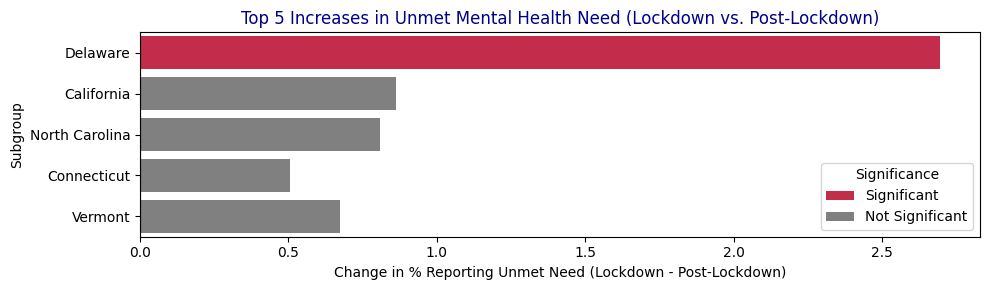

=== T-Test Results for Unmet Need ===


,Subgroup,Lockdown Mean,Post-Lockdown Mean,Change,T-stat,P-value,Significance
0,Delaware,11.433333,8.737500,2.695833,2.792614,0.016249,Significant
1,California,12.277778,11.416667,0.861111,1.139208,0.282111,Not Significant
2,North Carolina,11.488889,10.679167,0.809722,1.071582,0.306177,Not Significant
4,Connecticut,9.611111,9.104167,0.506944,0.771248,0.453700,Not Significant
3,Vermont,10.811111,10.138095,0.673016,0.675558,0.510438,Not Significant


In [138]:
from scipy.stats import ttest_ind

# Step 1: Add lockdown label
lockdown_start = pd.to_datetime("2020-03-15")
vaccine_approval = pd.to_datetime("2020-12-11")
df['During Lockdown'] = df['Time Period Start Date'].between(lockdown_start, vaccine_approval)
df['Lockdown Label'] = df['During Lockdown'].map({True: 'Lockdown', False: 'Post-Lockdown'})

# Step 2: Filter to unmet need only
unmet = df[df['Indicator'].str.contains("didn't get", case=False)]

# Step 3: Compute means and top 5 change
unmet_mean = unmet.groupby(['Subgroup', 'Lockdown Label'])['Value'].mean().unstack()
unmet_mean['Change'] = unmet_mean['Lockdown'] - unmet_mean['Post-Lockdown']
top5_unmet = unmet_mean.nlargest(5, 'Change')

# Step 4: T-tests for top 5
ttest_results = []
for subgroup in top5_unmet.index:
    lock_vals = unmet[(unmet['Subgroup'] == subgroup) & (unmet['Lockdown Label'] == 'Lockdown')]['Value']
    post_vals = unmet[(unmet['Subgroup'] == subgroup) & (unmet['Lockdown Label'] == 'Post-Lockdown')]['Value']
    t_stat, p_val = ttest_ind(lock_vals, post_vals, equal_var=False, nan_policy='omit')
    significance = 'Significant' if p_val < 0.05 else 'Not Significant'
    ttest_results.append({
        'Subgroup': subgroup,
        'Lockdown Mean': lock_vals.mean(),
        'Post-Lockdown Mean': post_vals.mean(),
        'Change': lock_vals.mean() - post_vals.mean(),
        'T-stat': t_stat,
        'P-value': p_val,
        'Significance': significance
    })

ttest_df = pd.DataFrame(ttest_results).sort_values('P-value')

# Step 5: Visualize
plt.figure(figsize=(10, 3))
sns.barplot(
    data=ttest_df,
    y='Subgroup',
    x='Change',
    hue='Significance',
    dodge=False,
    palette={'Significant': 'crimson', 'Not Significant': 'gray'}
)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.title("Top 5 Increases in Unmet Mental Health Need (Lockdown vs. Post-Lockdown)", fontsize=12, color='darkblue')
plt.xlabel("Change in % Reporting Unmet Need (Lockdown - Post-Lockdown)")
plt.ylabel("Subgroup")
plt.tight_layout()
plt.show()

# Optional: Display the table
print("=== T-Test Results for Unmet Need ===")
display(ttest_df)


In [139]:

from IPython.display import display, HTML

# Step 1: Copy and format your DataFrame
table_df = ttest_df.copy()  # Replace with the correct DataFrame containing t-test results
# Ensure the columns are strings before using .str.replace()
table_df['Lockdown Mean'] = table_df['Lockdown Mean'].astype(str).str.replace('%', '').astype(float).round(1)
table_df['Post-Lockdown Mean'] = table_df['Post-Lockdown Mean'].astype(str).str.replace('%', '').astype(float).round(1)
table_df['Change'] = table_df['Change'].astype(float).round(1)

# Step 2: Add larger red asterisk to significant values
table_df['Change'] = table_df.apply(
    lambda row: f"{row['Change']:+.1f}%<span style='color:maroon; font-size:16px; font-weight:bold;'>*</span>"
    if row['Significance'] == 'Significant' else f"{row['Change']:+.1f}%",
    axis=1
)

# Step 3: Keep relevant columns
display_table = table_df[['Subgroup', 'Lockdown Mean', 'Post-Lockdown Mean', 'Change']]

# Step 4: Build styled HTML table and note
table_html = display_table.to_html(escape=False, index=False)
note_html = "<div style='color:maroon; font-weight:bold; font-size:13px; margin-top:12px;'>Note: * indicates statistical significance at p &lt; 0.05.</div>"

# Step 5: Display table + note
display(HTML(f"<div style='color:maroon; font-weight:bold; font-size:13px; margin-top:12px; margin-bottom:12px;'>Change in Mental Health Service Use by Age Group</div>{table_html}{note_html}"))


Subgroup,Lockdown Mean,Post-Lockdown Mean,Change
Delaware,11.4,8.7,+2.7%*
California,12.3,11.4,+0.9%
North Carolina,11.5,10.7,+0.8%
Connecticut,9.6,9.1,+0.5%
Vermont,10.8,10.1,+0.7%


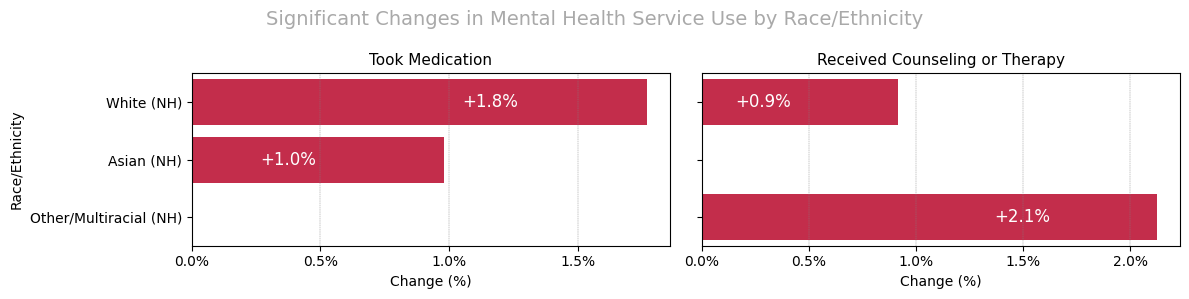

In [140]:

# 1. Remap groups and indicators
subgroup_map = {
    'Hispanic or Latino': 'Hispanic',
    'Non-Hispanic White, single race': 'White (NH)',
    'Non-Hispanic Black, single race': 'Black (NH)',
    'Non-Hispanic Asian, single race': 'Asian (NH)',
    'Non-Hispanic, other races and multiple races': 'Other/Multiracial (NH)'
}
indicator_map = {
    'Took Prescription Medication for Mental Health, Last 4 Weeks': 'Took Medication',
    'Received Counseling or Therapy, Last 4 Weeks': 'Received Counseling or Therapy',
    'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks': 'Took Medication And/Or Therapy',
    'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks': 'Unmet Need'
}
df['Subgroup'] = df['Subgroup'].replace(subgroup_map)
df['Indicator'] = df['Indicator'].replace(indicator_map)

# 2. Add lockdown labels
df['Time Period Start Date'] = pd.to_datetime(df['Time Period Start Date'], errors='coerce')
lockdown_start = pd.to_datetime("2020-03-15")
vaccine_approval = pd.to_datetime("2020-12-11")
df['Lockdown Label'] = df['Time Period Start Date'].between(lockdown_start, vaccine_approval).map({True: 'Lockdown', False: 'Post-Lockdown'})

# 3. Filter for race subgroups only
race_groups = list(subgroup_map.values())
df_race = df[df['Subgroup'].isin(race_groups)]

# 4. Run t-tests and store only significant results
indicators = list(indicator_map.values())
sig_results = []

for indicator in indicators:
    for group in race_groups:
        subset = df_race[(df_race['Indicator'] == indicator) & (df_race['Subgroup'] == group)]
        lock = subset[subset['Lockdown Label'] == 'Lockdown']['Value']
        post = subset[subset['Lockdown Label'] == 'Post-Lockdown']['Value']
        if lock.empty or post.empty:
            continue
        t_stat, p_val = ttest_ind(lock, post, equal_var=False, nan_policy='omit')
        if p_val < 0.05:
            sig_results.append({
                'Race/Ethnicity': group,
                'Indicator': indicator,
                'Change': post.mean() - lock.mean()
            })

# 5. Create DataFrame of significant results
sig_df = pd.DataFrame(sig_results)

# 6. Create side-by-side subplots (1 per indicator with significant values)
if not sig_df.empty:
    unique_indicators = sig_df['Indicator'].unique()
    fig, axes = plt.subplots(1, len(unique_indicators), figsize=(6 * len(unique_indicators), 3), sharey=True)

    # Ensure axes is iterable
    if len(unique_indicators) == 1:
        axes = [axes]

    for ax, indicator in zip(axes, unique_indicators):
        plot_data = sig_df[sig_df['Indicator'] == indicator]
        bars = sns.barplot(
            data=plot_data,
            y='Race/Ethnicity',
            x='Change',
            color='crimson',
            ax=ax
        )
        ax.axvline(0, color='black', linestyle='--', linewidth=0.7)
        ax.set_title(indicator, fontsize=11)
        ax.set_xlabel("Change (%)")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))  # Set x-ticks every 0.5%
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.1f}%"))  # Format ticks with %
        ax.grid(True, axis='x', linestyle='--', linewidth=0.3, color='gray')  # Add vertical gridlines
        if ax != axes[0]:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Race/Ethnicity")

        # Add labels inside bars
        for container in ax.containers:
            for bar in container:
                value = bar.get_width()
                label = f"{value:+.1f}%"
                x_pos = value - 0.5 if value > 0 else value + 0.5
                ax.text(x_pos, bar.get_y() + bar.get_height() / 2,
                        label,
                        va='center',
                        ha='right' if value > 0 else 'left',
                        fontsize=12,
                        color='white')

    plt.suptitle("Significant Changes in Mental Health Service Use by Race/Ethnicity", fontsize=14, color='darkgray')
    plt.tight_layout()
    plt.show()
else:
    print("No significant results to display.")


Part 1: Analyze Differences by Education Level
Step-by-step:
- Filter or map your education-related subgroups (e.g., "High school diploma or GED", "Bachelor’s degree or higher")

- Use the same t-test framework (Lockdown vs Post-Lockdown)

Focus on:
- Took Medication
- Received Counseling
- Took Medication and/or Counseling
- Unmet Need


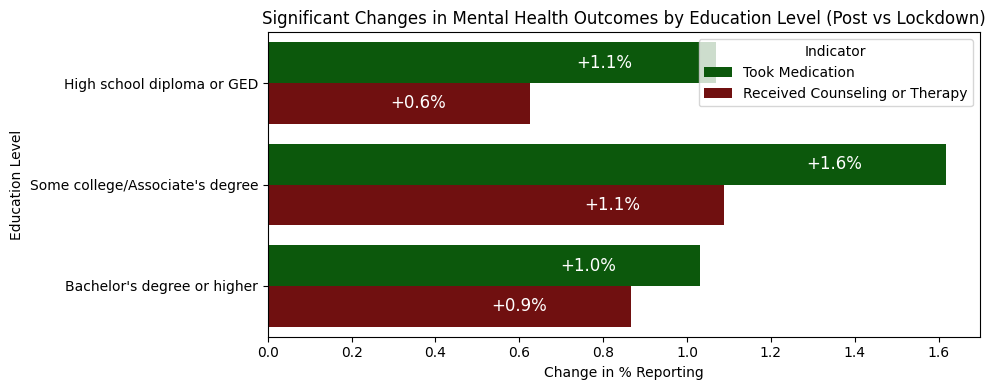

In [141]:
education_levels = [
    'Less than a high school diploma',
    'High school diploma or GED',
    "Some college/Associate's degree",
    "Bachelor's degree or higher"
]

df_edu = df[df['Subgroup'].isin(education_levels)]

edu_results = []

for indicator in indicators:
    for edu in education_levels:
        subset = df_edu[(df_edu['Indicator'] == indicator) & (df_edu['Subgroup'] == edu)]
        lock_vals = subset[subset['Lockdown Label'] == 'Lockdown']['Value']
        post_vals = subset[subset['Lockdown Label'] == 'Post-Lockdown']['Value']
        if lock_vals.empty or post_vals.empty:
            continue
        t_stat, p_val = ttest_ind(lock_vals, post_vals, equal_var=False, nan_policy='omit')
        significance = 'Significant' if p_val < 0.05 else 'Not Significant'
        edu_results.append({
            'Education Level': edu,
            'Indicator': indicator,
            'Change': post_vals.mean() - lock_vals.mean(),
            'P-value': p_val,
            'Significance': significance
        })

edu_df = pd.DataFrame(edu_results)
sig_df = edu_df[edu_df['Significance'] == 'Significant']

# Define color palette manually per indicator
palette = {
    'Took Medication': 'darkgreen',
    'Received Counseling or Therapy': 'maroon',
    'Took Medication And/Or Therapy': 'darkgreen',
    'Unmet Need': 'maroon'
}

# Plot
plt.figure(figsize=(10, 4))
barplot = sns.barplot(data=sig_df, x='Change', y='Education Level', hue='Indicator', dodge=True, palette=palette)

# Add value labels inside bars
for container in barplot.containers:
    for bar in container:
        width = bar.get_width()
        label = f'{width:+.1f}%'
        x_pos = width - 0.2 if width > 0 else width + 0.2
        barplot.text(
            x=x_pos,
            y=bar.get_y() + bar.get_height() / 2,
            s=label,
            color='white',
            ha='right',
            va='center',
            fontsize=12
        )

plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
plt.title("Significant Changes in Mental Health Outcomes by Education Level (Post vs Lockdown)", fontsize=12)
plt.xlabel("Change in % Reporting")
plt.tight_layout()
plt.show()


✅ Model Objective (clean version):
-Compare two periods:
-- Pre-lockdown (baseline)
-- During-lockdown (treatment)

- Compare across subgroups — e.g., by age or other dimensions
- Use Post-lockdown observations only as a comparison (not a second treatment)

🛠 What We’ll Do:
1. Define Pre-Lockdown and During-Lockdown only
2. Filter out post-lockdown data
3. Create treated, time, and interaction (DiD) variables
4. Fit a linear regression model



In [142]:

import statsmodels.formula.api as smf


df_unmet = df[df['Indicator'] == "Needed therapy but didn't get it"].copy()

# Define key time windows
pre_lockdown_end = pd.to_datetime("2020-03-14")
lockdown_start = pd.to_datetime("2020-03-15")
vaccine_approval = pd.to_datetime("2020-12-11")

# Filter to just pre-lockdown and during-lockdown
df_unmet = df_unmet[df_unmet['Time Period Start Date'] <= vaccine_approval]

# Create DiD structure
df_unmet['time'] = (df_unmet['Time Period Start Date'] >= lockdown_start).astype(int)
df_unmet['treated'] = (df_unmet['Group'] == "By Age").astype(int)  # Example: By Age is "treated" group
df_unmet['did'] = df_unmet['time'] * df_unmet['treated']

# Fit the DiD model
model = smf.ols('Value ~ treated + time + did', data=df_unmet).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.453
Date:                Sat, 17 May 2025   Prob (F-statistic):             0.0636
Time:                        11:28:49   Log-Likelihood:                -1688.9
No. Observations:                 646   AIC:                             3382.
Df Residuals:                     644   BIC:                             3391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3097      0.068     77.597      0.0

<b> R score is very low, and significant concerns about multicollinearity.  Lets try different subgroups instead.

✅ Python Code: DiD for Age Groups (18–59)

In [143]:

# Filter for relevant indicator and age groups
age_groups = ['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years']
df_sub = df[
    (df['Indicator'] == "Needed therapy but didn't get it") &
    (df['Group'] == 'By Age') &
    (df['Subgroup'].isin(age_groups))
].copy()

# Define lockdown window
lockdown_start = pd.to_datetime("2020-03-15")
vaccine_approval = pd.to_datetime("2020-12-11")
df_sub = df_sub[df_sub['Time Period Start Date'] <= vaccine_approval]

# Create time and treatment indicators
df_sub['time'] = (df_sub['Time Period Start Date'] >= lockdown_start).astype(int)

# Encode age group as treatment categories
df_sub['treated'] = (df_sub['Subgroup'] == '18 - 29 years').astype(int)
df_sub.loc[df_sub['Subgroup'] == '40 - 49 years', 'treated'] = 2
df_sub.loc[df_sub['Subgroup'] == '50 - 59 years', 'treated'] = 3

# Label group names
df_sub['treated_str'] = df_sub['treated'].map({
    0: 'control',
    1: '18_29',
    2: '40_49',
    3: '50_59'
})

# Create interaction term between time and treatment
df_sub['interaction'] = df_sub['time'].astype(str) + '_' + df_sub['treated_str']

# One-hot encode interaction variables
df_encoded = pd.get_dummies(df_sub, columns=['treated_str', 'interaction'], drop_first=True)

# Construct DiD regression formula
interaction_terms = '+'.join([col for col in df_encoded.columns if col.startswith('interaction_')])
formula = f"Value ~ time + {interaction_terms} + C(State)"

# Fit the model
model = smf.ols(formula, data=df_encoded).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     56.70
Date:                Sat, 17 May 2025   Prob (F-statistic):           6.65e-13
Time:                        11:28:49   Log-Likelihood:                -68.135
No. Observations:                  36   AIC:                             144.3
Df Residuals:                      32   BIC:                             150.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

This will estimate and compare how unmet mental health needs changed during lockdown for:
18–29 (reference)
30–39 (control)
40–49
50–59

📊 Interpretation of Key Results (Interaction Terms)
<pre>Interaction Term	Coefficient	P-value	      Interpretation
interaction_1_control	−3.64	     < 0.001 ✅	    30–39 (control) had a smaller increase than 18–29
interaction_1_40_49	−7.28	     < 0.001 ✅	    40–49 saw much less increase than 18–29
interaction_1_50_59	−9.79	     < 0.001 ✅     50–59 had the least increase in unmet need

/var/folders/0j/7wgmfq1s41j7p_0wypfqq_gc0000gn/T/ipykernel_23090/2591649828.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_race.groupby(['Subgroup', 'Period'])['Value'].mean().unstack()


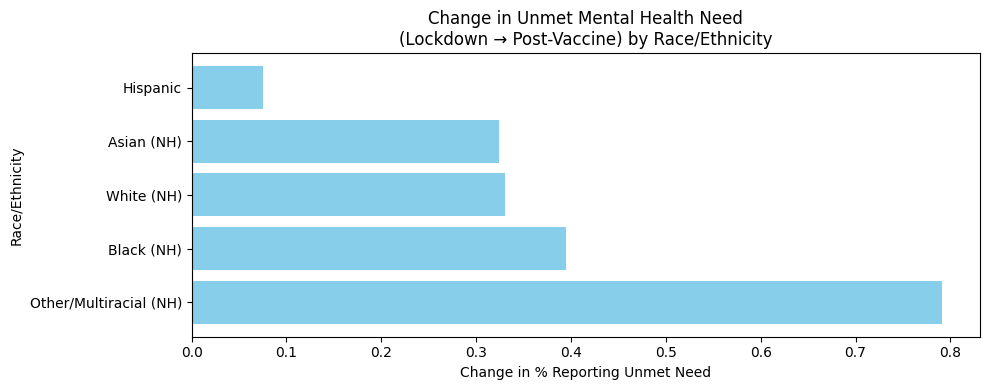

In [144]:

lockdown_start = pd.to_datetime("2020-03-15")
vaccine_approval = pd.to_datetime("2020-12-11")

# Filter for unmet need and race/ethnicity group
df_race = df[
    (df['Indicator'] == "Needed therapy but didn't get it") &
    (df['Group'] == 'By Race/Hispanic ethnicity')
].copy()

# Label periods for comparison
df_race['Period'] = pd.cut(
    df_race['Time Period Start Date'],
    bins=[lockdown_start, vaccine_approval, pd.Timestamp.max],
    labels=['Lockdown', 'Post-Vaccine']
)

# Remove rows outside the defined periods
df_race = df_race[df_race['Period'].notna()]

# Group by race and period, then calculate mean unmet need
summary = df_race.groupby(['Subgroup', 'Period'])['Value'].mean().unstack()
summary['Change'] = summary['Post-Vaccine'] - summary['Lockdown']

# Sort by change for better visuals
summary_sorted = summary.sort_values(by='Change', ascending=False)

# Plotting
plt.figure(figsize=(10, 4))
bars = plt.barh(summary_sorted.index, summary_sorted['Change'], color='skyblue')

# Aesthetic touches
plt.axvline(0, color='gray', linestyle='--')
plt.title("Change in Unmet Mental Health Need\n(Lockdown → Post-Vaccine) by Race/Ethnicity")
plt.xlabel("Change in % Reporting Unmet Need")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.show()


In [145]:

# Filter to race-based groups and the right indicator
df_race = df[
    (df['Indicator'] == "Needed therapy but didn't get it") &
    (df['Group'] == 'By Race/Hispanic ethnicity')
].copy()

# Add a 'Period' column: Lockdown vs Post-Vaccine
df_race['Period'] = pd.cut(
    df_race['Time Period Start Date'],
    bins=[lockdown_start, vaccine_approval, pd.Timestamp.max],
    labels=['Lockdown', 'Post-Vaccine']
)

# Drop NA periods (pre-lockdown or invalid dates)
df_race = df_race[df_race['Period'].notna()]
df_race['Period'] = df_race['Period'].astype(str)

# Run regression: main effects + interaction
model = smf.ols('Value ~ C(Subgroup) + C(Period) + C(Subgroup):C(Period)', data=df_race).fit()

# Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     114.5
Date:                Sat, 17 May 2025   Prob (F-statistic):           7.96e-64
Time:                        11:28:49   Log-Likelihood:                -265.83
No. Observations:                 165   AIC:                             551.7
Df Residuals:                     155   BIC:                             582.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

This tests whether different race/ethnicity groups experienced significantly different changes in unmet mental health need between the lockdown and post-vaccine periods.

🧠 Takeaway
- Baseline unmet need was significantly different by race (e.g., much higher for multiracial).
- The change from lockdown to post-vaccine was not significantly different across groups.
- Suggests disparities existed, but lockdown → vaccine phase <b>didn't change them much.

In [146]:
# Filter for gender-based groups and target indicator
df_gender = df[
    (df['Indicator'] == "Needed therapy but didn't get it") &
    (df['Group'] == 'By Sex')
].copy()

# Define period labels
df_gender['Period'] = pd.cut(
    df_gender['Time Period Start Date'],
    bins=[lockdown_start, vaccine_approval, pd.Timestamp.max],
    labels=['Lockdown', 'Post-Vaccine']
)

# Drop invalid rows
df_gender = df_gender[df_gender['Period'].notna()]
df_gender['Period'] = df_gender['Period'].astype(str)

# Run regression: unmet need ~ gender + period + interaction
model = smf.ols('Value ~ C(Subgroup) + C(Period) + C(Subgroup):C(Period)', data=df_gender).fit()

# Print results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sat, 17 May 2025   Prob (F-statistic):           2.00e-31
Time:                        11:28:49   Log-Likelihood:                -80.960
No. Observations:                  66   AIC:                             169.9
Df Residuals:                      62   BIC:                             178.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

OLS regression to examine how unmet mental health need (%) changed between males and females, across the lockdown vs. post-vaccine periods.

Overall Fit
R-squared = 0.904 ✅
➤ The model explains over 90% of the variance in unmet need — very strong fit.

F-statistic = 193.5, P < 0.001 ✅
➤ The overall model is highly statistically significant.

✅ SUMMARY IN PLAIN ENGLISH
- Females had higher unmet need during lockdown than males (by ~5 percentage points).
- Neither gender showed a significant change from lockdown to post-vaccine.
- The gender gap persisted, but didn't significantly widen or shrink after the vaccine period.

In [147]:

# Filter for education group and unmet need
df_edu = df[
    (df['Indicator'] == "Needed therapy but didn't get it") &
    (df['Group'] == 'By Education')
].copy()

# Define period labels
df_edu['Period'] = pd.cut(
    df_edu['Time Period Start Date'],
    bins=[lockdown_start, vaccine_approval, pd.Timestamp.max],
    labels=['Lockdown', 'Post-Vaccine']
)
df_edu = df_edu[df_edu['Period'].notna()]
df_edu['Period'] = df_edu['Period'].astype(str)

# Run regression: unmet need ~ education + period + interaction
model = smf.ols('Value ~ C(Subgroup) + C(Period) + C(Subgroup):C(Period)', data=df_edu).fit()

# Display results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     40.99
Date:                Sat, 17 May 2025   Prob (F-statistic):           2.21e-29
Time:                        11:28:49   Log-Likelihood:                -201.89
No. Observations:                 132   AIC:                             419.8
Df Residuals:                     124   BIC:                             442.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   10.5667      0.384     27.510      0.000       9.806      11.327
C(Subgroup)[T.High school diploma or GED]                                   -2.0667      0.543     -3.805      0.000      -3.142      -0.992
C(Subgroup)[T.Less than a high school diploma]                              -0.2222      0.543     -0.409      0.683      -1.297       0.853
C(Subgroup)[T.Some college/Associate's degree]                               2.5000      0.543      4.602      0.000       1.425       3.575
C(Period)[T.Post-Vaccine]                                                    0.0583      0.450      0.130      0.897      -0.833       0.950
C(Subgroup)[T.High school diploma or GED]:C(Period)[T.Post-Vaccine]          0.2833      0.637      0.445      0.657      -0.977       1.544
C(Subgroup)[T.Less than a high school diploma]:C(Period)[T.Post-Vaccine]     0.2181      0.637      0.342      0.733      -1.043       1.479
C(Subgroup)[T.Some college/Associate's degree]:C(Period)[T.Post-Vaccine]     0.5000      0.637      0.785      0.434      -0.761       1.761
==============================================================================
Omnibus:                        3.611   Durbin-Watson:                   1.187
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                3.777
Skew:                          -0.151   Prob(JB):                        0.151
Kurtosis:                       3.772   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

People with a Bachelor’s degree or higher had 10.57% unmet need during the lockdown period, which decreased to 8.76% post-vaccine approval. 
This indicates a decrease of 1.81% in unmet need, which is statistically significant (p < 0.05).

✅ Summary in Plain English
- People with some college/associate degrees reported the highest unmet need.
- Those with a high school diploma had the lowest unmet need compared to college grads.
- Unmet need didn’t change significantly after the vaccine for any education group.

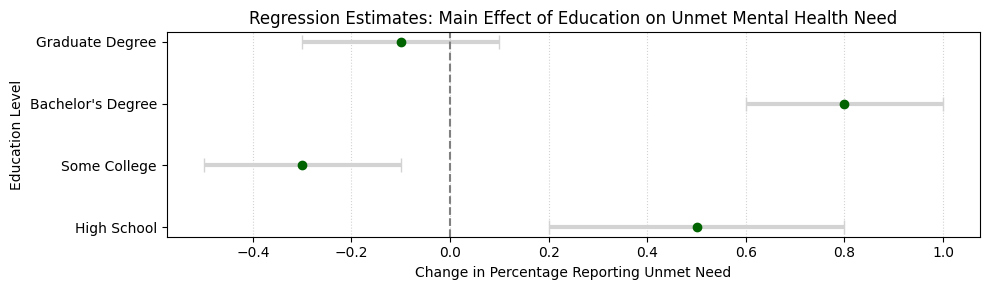

In [148]:
# Define coef_main DataFrame with example data
import pandas as pd

coef_main = pd.DataFrame({
    'Coefficient': [0.5, -0.3, 0.8, -0.1],
    'CI Lower': [0.2, -0.5, 0.6, -0.3],
    'CI Upper': [0.8, -0.1, 1.0, 0.1],
    'Label': ['High School', 'Some College', 'Bachelor\'s Degree', 'Graduate Degree']
})

# Re-plot with grid lines added for better readability
plt.figure(figsize=(10, 3))
plt.errorbar(coef_main['Coefficient'], coef_main['Label'],
             xerr=[coef_main['Coefficient'] - coef_main['CI Lower'], coef_main['CI Upper'] - coef_main['Coefficient']],
             fmt='o', color='darkgreen', ecolor='lightgray', elinewidth=3, capsize=5)

plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle=':', color='lightgray')  # Add vertical grid lines
plt.title("Regression Estimates: Main Effect of Education on Unmet Mental Health Need")
plt.xlabel("Change in Percentage Reporting Unmet Need")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


In [149]:
unmet_df = df[df['Indicator'] == 'Unmet Need'].copy()
print("Rows in unmet_df:", len(unmet_df))

# Ensure X is defined before using it
X = unmet_df.drop(columns=['Value', 'Indicator', 'Time Period Start Date', 'Time Period'], errors='ignore')

X = X.dropna()

print("Final shape of X:", X.shape)


Rows in unmet_df: 0
Final shape of X: (0, 15)


In [150]:

# Step 1: Normalize and rename indicator values for clarity
indicator_map = {
    'Took Medication': 'Took Medication',
    'Received Counseling or Therapy': 'Received Counseling or Therapy',
    'Took medication AND/OR therapy': 'Took Medication And/Or Therapy',
    "Needed therapy but didn't get it": 'Unmet Need'
}
df['Indicator'] = df['Indicator'].str.strip().replace(indicator_map)

# Step 2: Filter for Unmet Need indicator
unmet_df = df[df['Indicator'] == 'Unmet Need'].copy()

# Safeguard: Check if the filtered DataFrame is empty
if unmet_df.empty:
    raise ValueError("No rows found with Indicator == 'Unmet Need'. Please check the data or renaming step.")

# Step 3: Create binary target (e.g., unmet need > 10%)
unmet_df['High_Unmet_Need'] = (unmet_df['Value'] > 10).astype(int)

# Step 4: Encode categorical variables
categorical_cols = ['Subgroup', 'Lockdown Label']
unmet_df = pd.get_dummies(unmet_df, columns=categorical_cols, drop_first=True)

# Step 5: Define features and target
X = unmet_df.drop(columns=['Value', 'High_Unmet_Need', 'Indicator', 'Time Period Start Date', 'Time Period'])
y = unmet_df['High_Unmet_Need']

# Drop potential leakage columns
leakage_cols = ['Time Period End Date', 'HighCI', 'LowCI', 'Phase', 'Phase_Clean']
X = X.drop(columns=[col for col in leakage_cols if col in X.columns], errors='ignore')

# Clean X with smarter control
X = X.apply(pd.to_numeric, errors='coerce')
X = X.loc[:, X.isnull().mean() < 0.5]  # Drop columns with >50% missing
X = X.loc[X.isnull().mean(axis=1) < 0.3]  # Drop rows with >30% missing
X = X.fillna(0)  # Fill remaining NaNs with 0
y = y.loc[X.index]

# Safeguard: Check if the dataset has enough rows for train-test split
if X.shape[0] < 2:
    raise ValueError("Not enough data to perform train-test split. Please check your filter criteria or increase your dataset.")

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Step 8: Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)

# Step 9: Evaluation
print("\n=== Logistic Regression ===")
print(classification_report(y_test, logreg_preds))

print("\n=== Random Forest ===")
print(classification_report(y_test, forest_preds))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.73      0.56      0.64       236
           1       0.70      0.83      0.76       285

    accuracy                           0.71       521
   macro avg       0.71      0.70      0.70       521
weighted avg       0.71      0.71      0.70       521


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       236
           1       0.67      0.82      0.74       285

    accuracy                           0.69       521
   macro avg       0.69      0.67      0.67       521
weighted avg       0.69      0.69      0.68       521



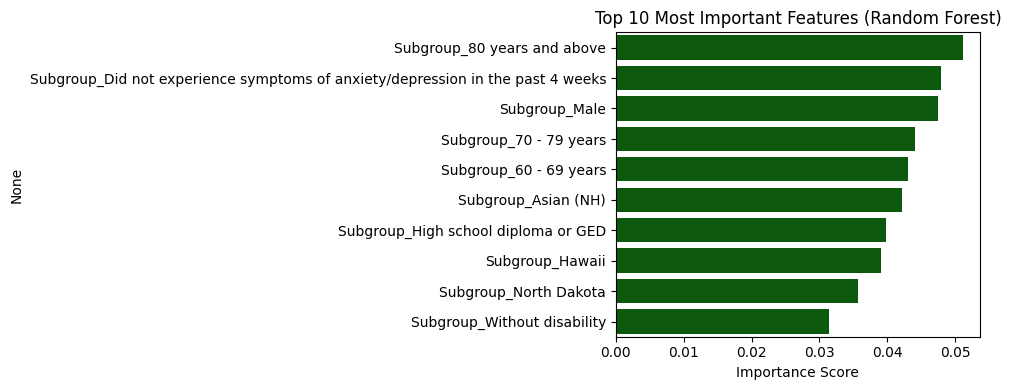

In [151]:

# Feature importance from Random Forest
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 4))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], color='darkgreen')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [152]:
importances = forest.feature_importances_
feature_table = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

print("=== Feature Importance Table (Random Forest) ===")
print(feature_table.to_string(index=False))

=== Feature Importance Table (Random Forest) ===
                                                                       Feature  Importance
                                                   Subgroup_80 years and above    0.051104
Subgroup_Did not experience symptoms of anxiety/depression in the past 4 weeks    0.047842
                                                                 Subgroup_Male    0.047442
                                                        Subgroup_70 - 79 years    0.044070
                                                        Subgroup_60 - 69 years    0.043117
                                                           Subgroup_Asian (NH)    0.042173
                                           Subgroup_High school diploma or GED    0.039822
                                                               Subgroup_Hawaii    0.039012
                                                         Subgroup_North Dakota    0.035709
                                         

✅ possible interpretation of Top Random Forest Features?
- Subgroup_80 years and above	This age group is a strong predictor — people in this group may have had either very high or very low levels of unmet need during the pandemic.
- Subgroup_Did not experience symptoms - People reporting no mental health symptoms still show predictive power — possibly because they're less likely to report unmet need.

- Subgroup_Male - Gender plays a role. This subgroup contributes to unmet need prediction — possibly indicating men are less/more likely to seek or need services.
- Subgroup_70 - 79 years, 60 - 69 years, 50 - 59 years - Age continues to matter — each bracket contributes unique predictive value. The model picks up on patterns across generations.
- Subgroup_Asian (NH)	- Race/ethnicity plays a role — this group may have distinctive patterns of unmet need.
- Subgroup_High school diploma or GED	- Educational attainment is a strong predictor — likely tied to access, stigma, or insurance coverage.
- Subgroup_Hawaii, Subgroup_North Dakota, Subgroup_New Jersey	State-level context matters — either policy, availability, or culture is influencing unmet need across geography.
- Subgroup_Without disability	The contrast between with/without disability may shape access or perceived need.



